In [18]:
import pandas as pd

df= pd.read_csv('angio_list.csv')
not_use = [1336,275,228,248,712,631,268,4,180,1364]
not_use = [str(p) for p in not_use]
for item in df.iterrows():
    if item[1]['origin'].split('-')[1].split('.')[0] in not_use:
        print(1)

print(df)

1
1
1
1
1
1
1
1
1
1
          origin  segmentation   x1   y1   x2   y2  train
0      a-162.jpg   b-162_M.png  184  128  363  369    1.0
1     a-1449.jpg  b-1449_M.png  158   69  378  497    1.0
2      a-279.jpg   b-279_M.png  217  237  120  369    1.0
3      a-327.jpg   b-327_M.png   69  109  318  422    1.0
4     a-1268.jpg  b-1268_M.png  285  120  366  408    1.0
...          ...           ...  ...  ...  ...  ...    ...
1525  a-1119.jpg  b-1119_M.png  250  167  295  392    0.0
1526  a-1439.jpg  b-1439_M.png  244  116  422  277    0.0
1527   a-413.jpg   b-413_M.png  111  108  438  339    0.0
1528   a-663.jpg   b-663_M.png  165  119  240  293    0.0
1529   a-290.jpg   b-290_M.png  214  186  260  348    0.0

[1530 rows x 7 columns]


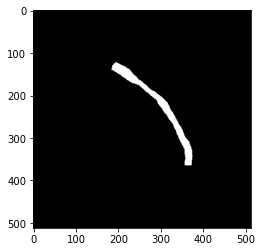

In [14]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('../angiosegmentation/mask_correct/b-162_M.png')*255
plt.imshow(img)

2.8284271247461903
0.011091871077436
(256, 256)
1.1266256353195441e-07
0.9997583867336217


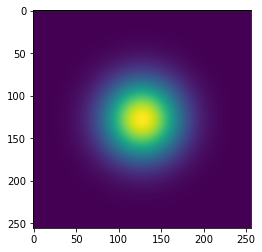

In [15]:
import numpy as np
import matplotlib.pyplot as plt
 
# Initializing value of x-axis and y-axis
# in the range -2 to +2
x, y = np.meshgrid(np.linspace(-2,2,256), np.linspace(-2,2,256))
dst = np.sqrt(x*x+y*y)

print(dst[0,0])
print(dst[128,128])
print(dst.shape)
 
# Initializing sigma and muu
sigma = 0.5
muu = 0.0001
 
# Calculating Gaussian array
gauss = np.exp(-( (dst-muu)**2 / ( 2.0 * sigma**2 ) ) )
print(gauss[0,0])
print(gauss[128,128])
plt.imshow(gauss)

In [4]:
import numpy as  np
import cv2

annotated_dot = np.zeros((512,512))
annotated_dot[int(200),int(200)]=255# y1 x1
annotated_dot[int(400),int(400)]=255

annotated_dot = cv2.GaussianBlur(annotated_dot,(15,15),0)

temp = np.stack([annotated_dot,annotated_dot,annotated_dot],axis=2)
cv2.imshow('dfdf',temp)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import numpy as  np
import cv2

def gaussian_heatmap(sigma: int, spread: int):
    extent = int(spread * sigma)
    center = spread * sigma / 2
    heatmap = np.zeros([extent, extent], dtype=np.float32)
    for i_ in range(extent):
        for j_ in range(extent):
            heatmap[i_, j_] = 1 / 2 / np.pi / (sigma ** 2) * np.exp(
                -1 / 2 * ((i_ - center - 0.5) ** 2 + (j_ - center - 0.5) ** 2) / (sigma ** 2))
    heatmap = (heatmap / np.max(heatmap) * 255).astype(np.uint8)
    return heatmap


hm = gaussian_heatmap(sigma=10, spread=3)

cv2.imshow("hm", hm)
cv2.waitKey(0)

48